In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #for encoding categorical values 
from imblearn.over_sampling import SMOTE #to deal with unbalance data by oversampling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle #for saving files

In [7]:
dataset = pd.read_csv(r"C:\Users\Alarto\Documents\ml\lowlight\customer\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
dataset.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
dataset.shape

(7043, 21)

In [10]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
dataset.info()
#as we can see there is no null objects in the table. also total charges are string objects which is not logical, then we need to convert it to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
dataset = dataset.drop(columns=['customerID'])
#definitely not necessary for modelling 

In [13]:
for col in dataset.columns:
    print(col, dataset[col].unique())
    print('-'*50)
#to check all the unique values 

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [14]:
dataset[dataset["TotalCharges"] == " "]
#empty spaces

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
dataset["TotalCharges"] = dataset["TotalCharges"].replace({" ": "0.0"})
dataset[dataset["TotalCharges"] == " "]
#have replaced empty spaces with zero which logical

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)
dataset["TotalCharges"]
#converting all the string objects to numerical float values

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [17]:
print(dataset["Churn"].value_counts())
#checking distribution of target column
#as we can see there is imbalance, a lot of "No" values

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [18]:
#Let's start Exploratory Data Analysis(EDA)
dataset.describe()
#check basic stat information of numerical categories 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
#Let's analyse numerical cat firstly. Check distribution using sns
from matplotlib.lines import lineStyles


def plot_histogram(df, column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    #calculate mean and median values
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    #add vertical lines for mean and median
    plt.axvline(col_mean, color='red', linestyle = '--', label="Mean")
    plt.axvline(col_median, color='green', linestyle = '-', label="Median")
    
    plt.legend()
    plt.show()

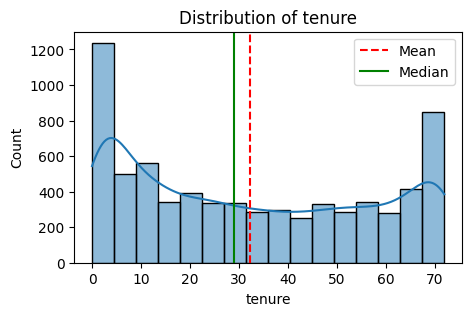

In [20]:
plot_histogram(dataset, "tenure")

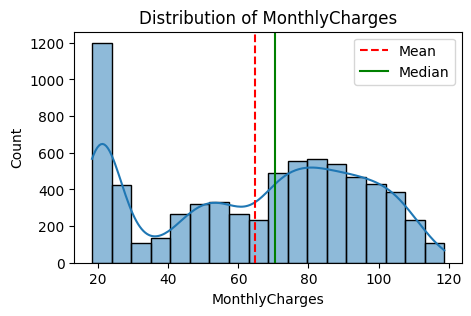

In [21]:
plot_histogram(dataset, "MonthlyCharges")

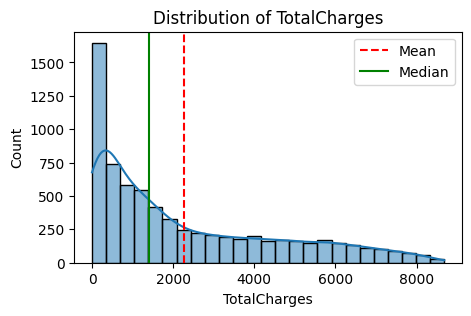

In [22]:
plot_histogram(dataset, "TotalCharges")

In [23]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.show()

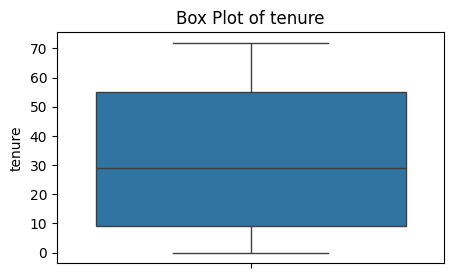

In [24]:
plot_boxplot(dataset, 'tenure')
#no outliers

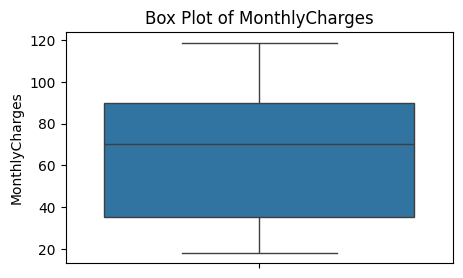

In [25]:
plot_boxplot(dataset, 'MonthlyCharges')

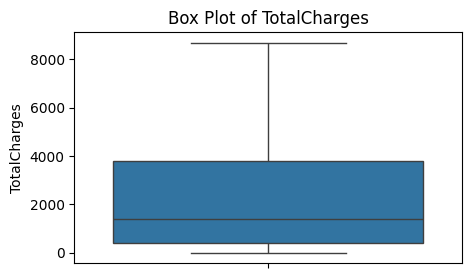

In [26]:
plot_boxplot(dataset, 'TotalCharges')

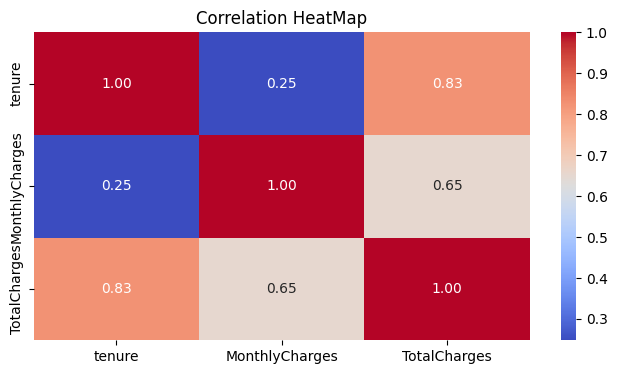

In [27]:
#Correlation Matrix Heat Map
plt.figure(figsize=(8, 4))
sns.heatmap(dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation HeatMap")
plt.show()



In [28]:
#Working with categorical features
categorical_cols = dataset.select_dtypes(include="object").columns.to_list()
categorical_cols = ["SeniorCitizens"] + categorical_cols
categorical_cols

['SeniorCitizens',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

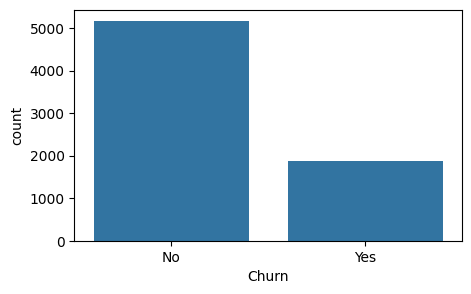

In [29]:
plt.figure(figsize=(5,3))
sns.countplot(x=dataset["Churn"])
plt.show()

In [30]:
#data preprocessing 
#label encoding of target column
dataset["Churn"] = dataset["Churn"].replace({"Yes": 1, "No": 0})
dataset["Churn"]

C:\Users\Alarto\AppData\Local\Temp\ipykernel_11008\1136971210.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["Churn"] = dataset["Churn"].replace({"Yes": 1, "No": 0})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [31]:
#label encoding 
object_cols = dataset.select_dtypes(include="object").columns.to_list()
#initialize a dictionary to save the encoders 
encoders = {}
#apply label encoding and store
for column in object_cols:
    label_encoder = LabelEncoder()
    dataset[column] = label_encoder.fit_transform(dataset[column])
    encoders[column] = label_encoder
#save the encoders to pickle file

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [32]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [33]:
#splitting target and features
X = dataset.drop(columns=["Churn"])
y = dataset["Churn"]

In [34]:
#split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts())
#imbalance

Churn
0    4138
1    1496
Name: count, dtype: int64


In [35]:
#Synthetic minority oversampling technique using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())



c:\Users\Alarto\anaconda3\envs\retinex_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Churn
0    4138
1    4138
Name: count, dtype: int64


In [36]:
#model training with default hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [37]:
#dictionary to store cross-validation results
cv_scores = {}
#perform 5-fold cross validation for each model 

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------


In [38]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [39]:
#since Random Forest gives better results, i will use rfc
rfc = RandomForestClassifier(random_state=42)

In [46]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [47]:
#model evaluation
y_test_pred = rfc.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_test_pred)}")
print(f"Confusion matrix: {confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report: {classification_report(y_test, y_test_pred)}")

Accuracy score: 0.7771469127040455
Confusion matrix: [[880 156]
 [158 215]]
Classification report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [52]:
#save the trained model as pickle file
model_data = {"model": rfc, "features_name": X.columns.to_list()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)


In [53]:
#load the saved model and features 

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
loaded_features = model_data["features_name"]

In [55]:
loaded_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']